### **EDA + LOGISTIC REGRESSION - Banking Marketing Campaign**

### EDA

**STEP 1: LOAD THE DATA FRAME**

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
df.head()
                 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**STEP 2: INICIAL ANALYSIS, DEFINING VARIABLES AND DATA CLEANING**

In [4]:
print("Dimension of data frame: ", df.shape)

Dimension of data frame:  (41188, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#CHECKING AND ANALYSING THE COLUMNS

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In conclusion we have 41188 rows in 21 columns, with the followings variables:

_**Categorical**_

-`job`: type of client's job. 
-``marital``: Marital status of the client.
-``education``: Customer's educational level.
-``default``: credit in default, yes or no.
-``housing``: Housing loan, yes or no.
-``loan``: Personal loan, yes or no.
-``contact``: Type of contact communication.
-``month``: Last contact month in the year.
``day_of_week``: Last day of contact in the week.
``poutcome``: Result of the previous marketing campaign.
``y``: Target variable. Indicates whether the customer has subscribed to a term deposit, yes or no.

_**Numerical**_

``age``: Age of the customer 1
``duration``: Duration of the last contact in seconds.
``campaign``: Number of contacts made during this campaign and for this customer.
``pdays``: Number of days that passed after the customer was last contacted from a previous campaign (999 means that the customer was not contacted previously).
``previous``: Number of contacts made before this campaign and for this customer.
``emp.var.rate``: Employment variation rate - quarterly indicator.
``cons.price.idx``: Consumer price index - monthly indicator.
``cons.conf.idx``: Consumer confidence index - monthly indicator.
``euribor3m``: 3-month Euribor rate - daily indicator.
``nr.employed``: Number of employees - quarterly indicator.

In [7]:
# FINDING THE DUPLICATE DATA

print(f"age :{df['age'].duplicated().sum()}")
print(f"y: {df['y'].duplicated().sum()}")


age :41110
y: 41186


In [8]:
# DELETING THE IRRELEVANT INFORMATION

df.drop(['pdays','day_of_week','marital','cons.price.idx','education','month','contact'], axis = 1, inplace=True)
df.head()

,age,job,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,no,261,1,0,nonexistent,1.1,-36.4,4.857,5191.0,no
1,57,services,unknown,no,no,149,1,0,nonexistent,1.1,-36.4,4.857,5191.0,no
2,37,services,no,yes,no,226,1,0,nonexistent,1.1,-36.4,4.857,5191.0,no
3,40,admin.,no,no,no,151,1,0,nonexistent,1.1,-36.4,4.857,5191.0,no
4,56,services,no,no,yes,307,1,0,nonexistent,1.1,-36.4,4.857,5191.0,no


**STEP 3: ANALYSIS OF VARIABLES**

**_3.0 Categorical:_**

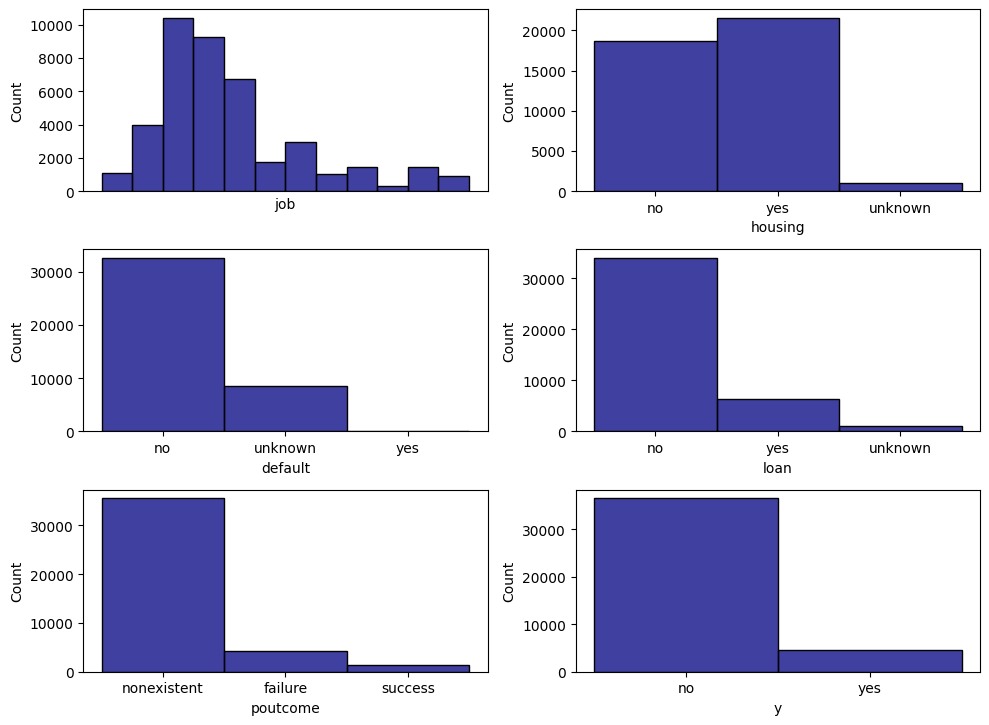

<Figure size 640x480 with 0 Axes>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axis = plt.subplots(3, 2, figsize=(10, 8))

color = 'navy'

sns.histplot(ax=axis[0, 0], data=df, x="job", color=color).set_xticks([])
sns.histplot(ax=axis[1, 0], data=df, x="default", color=color)
sns.histplot(ax=axis[0, 1], data=df, x="housing", color=color)
sns.histplot(ax=axis[1, 1], data=df, x="loan", color=color)
sns.histplot(ax=axis[2, 0], data=df, x="poutcome", color=color)
sns.histplot(ax=axis[2, 1], data=df, x="y", color=color)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()


**_3.1 Numerical:_**

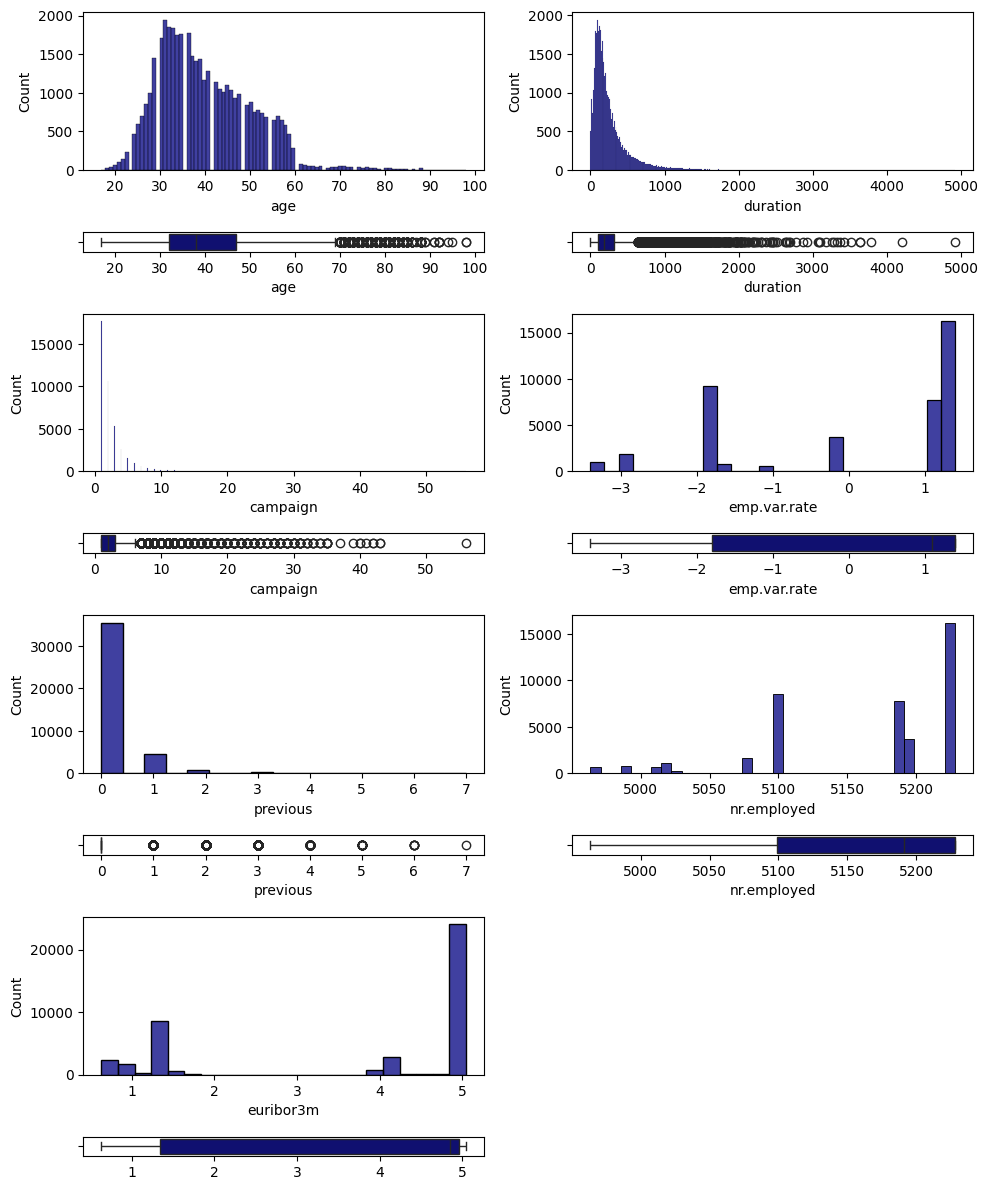

In [10]:
# Create the figure
fig, axis = plt.subplots(8, 2, figsize=(10, 12), gridspec_kw={"height_ratios": [8, 1, 8, 1, 8, 1, 8, 1]})

color = 'navy'

sns.histplot(ax=axis[0, 0], data=df, x="age", color=color)
sns.boxplot(ax=axis[1, 0], data=df, x="age", color=color)

sns.histplot(ax=axis[0, 1], data=df, x="duration", color=color)
sns.boxplot(ax=axis[1, 1], data=df, x="duration", color=color)

sns.histplot(ax=axis[2, 0], data=df, x="campaign", color=color)
sns.boxplot(ax=axis[3, 0], data=df, x="campaign", color=color)

sns.histplot(ax=axis[2, 1], data=df, x="emp.var.rate", color=color)
sns.boxplot(ax=axis[3, 1], data=df, x="emp.var.rate", color=color)

sns.histplot(ax=axis[4, 0], data=df, x="previous", color=color)
sns.boxplot(ax=axis[5, 0], data=df, x="previous", color=color)

sns.histplot(ax=axis[4, 1], data=df, x="nr.employed", color=color)
sns.boxplot(ax=axis[5, 1], data=df, x="nr.employed", color=color)

sns.histplot(ax=axis[6, 0], data=df, x="euribor3m", color=color)
sns.boxplot(ax=axis[7, 0], data=df, x="euribor3m", color=color)

fig.delaxes(axis[6, 1])
fig.delaxes(axis[7, 1])

# Set axis labels
for ax in axis[-1]:
    ax.set_xlabel('')

# Adjust the layout
plt.tight_layout()

# Display the layout
plt.show()


**_3.2 Numerical-numerical:_**

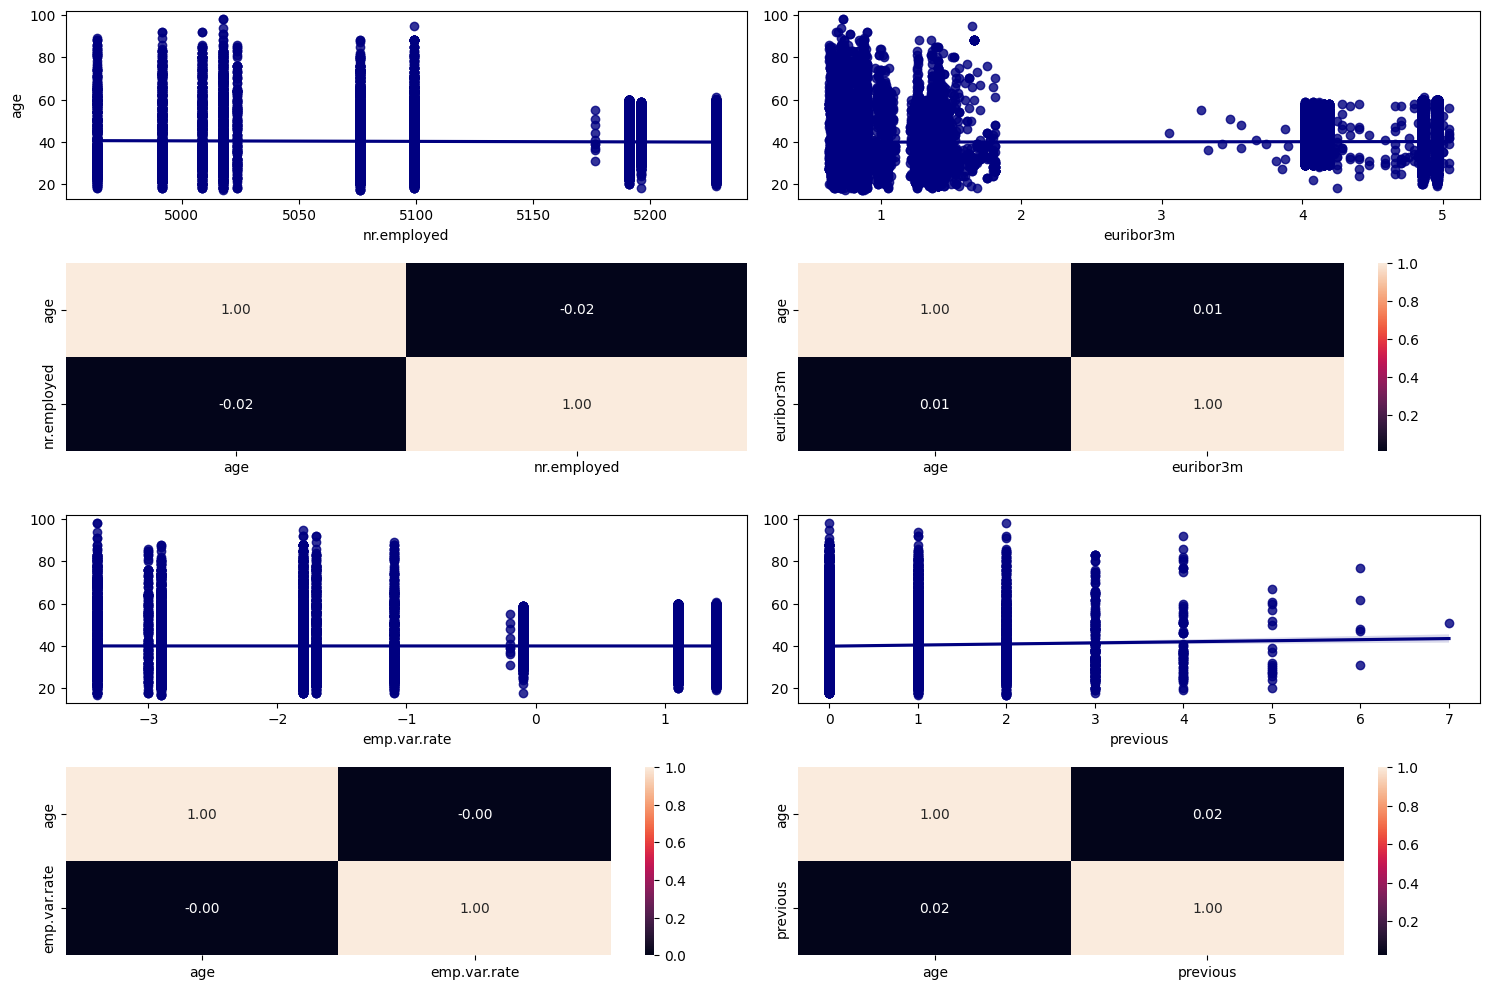

In [11]:
# Creating the figures
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Set axis labels
sns.regplot(ax = axis[0, 0], data = df, x = "nr.employed", y = "age", color= "navy")
sns.heatmap(df[["age", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False, color="navy")

sns.regplot(ax = axis[0, 1], data = df, x = "euribor3m", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], color="navy")

sns.regplot(ax = axis[2, 0], data = df, x = "emp.var.rate", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], color="navy").set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = df, x = "previous", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], color="navy").set(ylabel = None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**_3.3 Categorical - Categorical_**

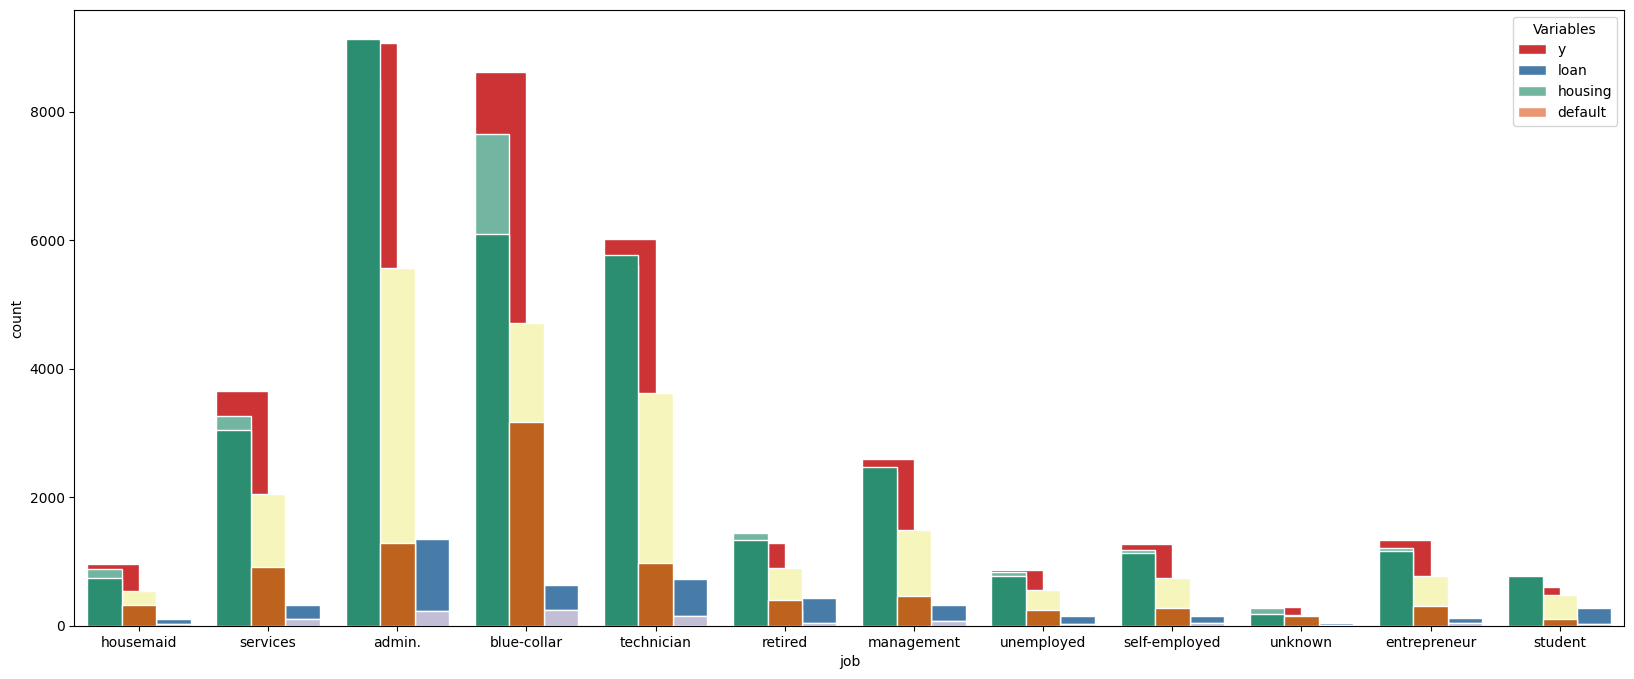

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Plot 'job' compared to 'y', 'loan', 'housing', and 'default'
sns.countplot(data=df, x="job", hue="y", palette="Set1", edgecolor="w", linewidth=1)
sns.countplot(data=df, x="job", hue="loan", palette="Set2", edgecolor="w", linewidth=1)
sns.countplot(data=df, x="job", hue="housing", palette="Set3", edgecolor="w", linewidth=1)
sns.countplot(data=df, x="job", hue="default", palette="Dark2", edgecolor="w", linewidth=1)

# Create a combined legend for all variables
plt.legend(title="Variables", labels=['y', 'loan', 'housing', 'default'], loc="upper right")


# Show plot
plt.show()


**_3.4 Numerical - Categorical_**

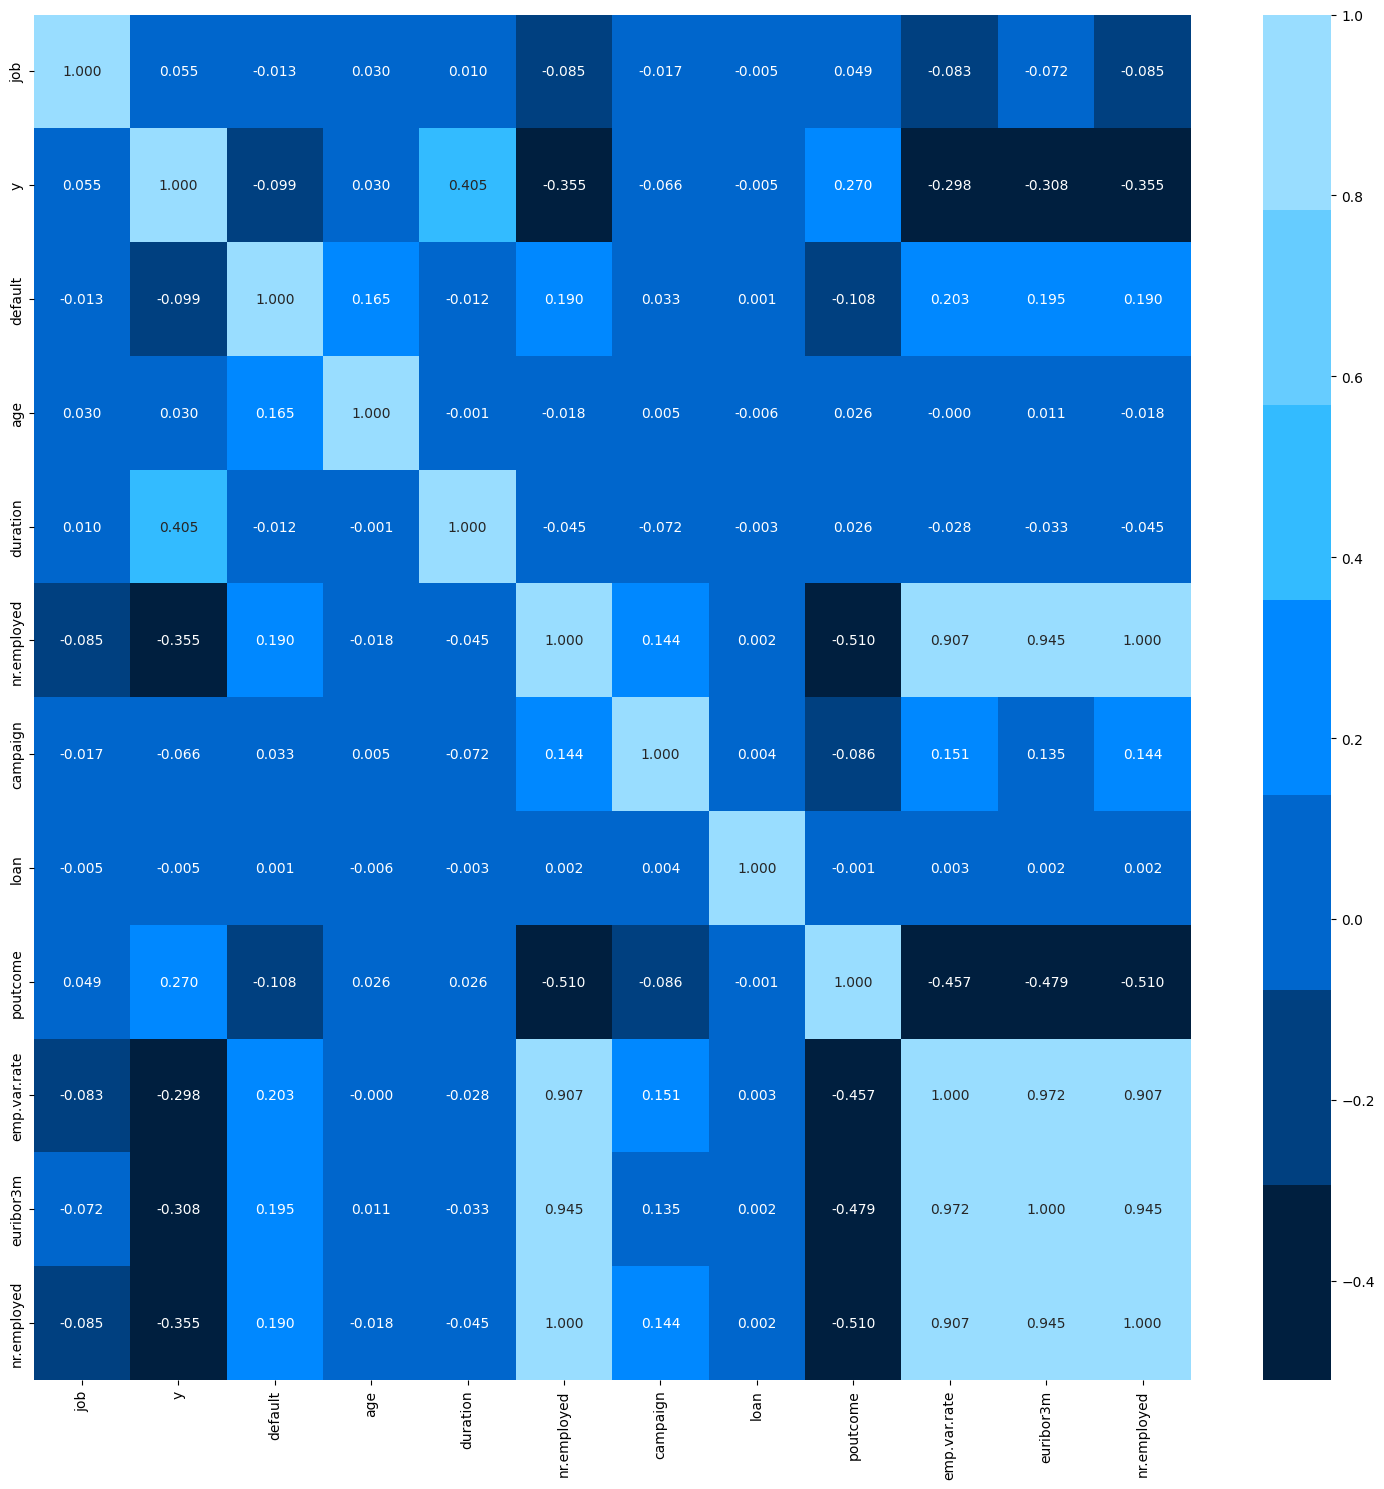

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

# Assuming df contains your DataFrame with appropriate data
# Factorize the categorical variables
df["job"] = pd.factorize(df["job"])[0]
df["y"] = pd.factorize(df["y"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]

# Create a custom colormap with shades of navy blue
navy_palette = ["#001f3f", "#004080", "#0066cc", "#0088ff", "#33bbff", "#66ccff", "#99ddff"]
cmap_navy = ListedColormap(navy_palette)

fig, axes = plt.subplots(figsize=(15, 15))

# Create the heatmap using the navy colormap
sns.heatmap(df[["job", "y", "default", "age", "duration","nr.employed", "campaign","loan","poutcome","emp.var.rate","euribor3m","nr.employed"]].corr(), annot=True, fmt=".3f", cmap=cmap_navy)

plt.tight_layout()

# Show the plot
plt.show()


**_3.5 All data analysis_**

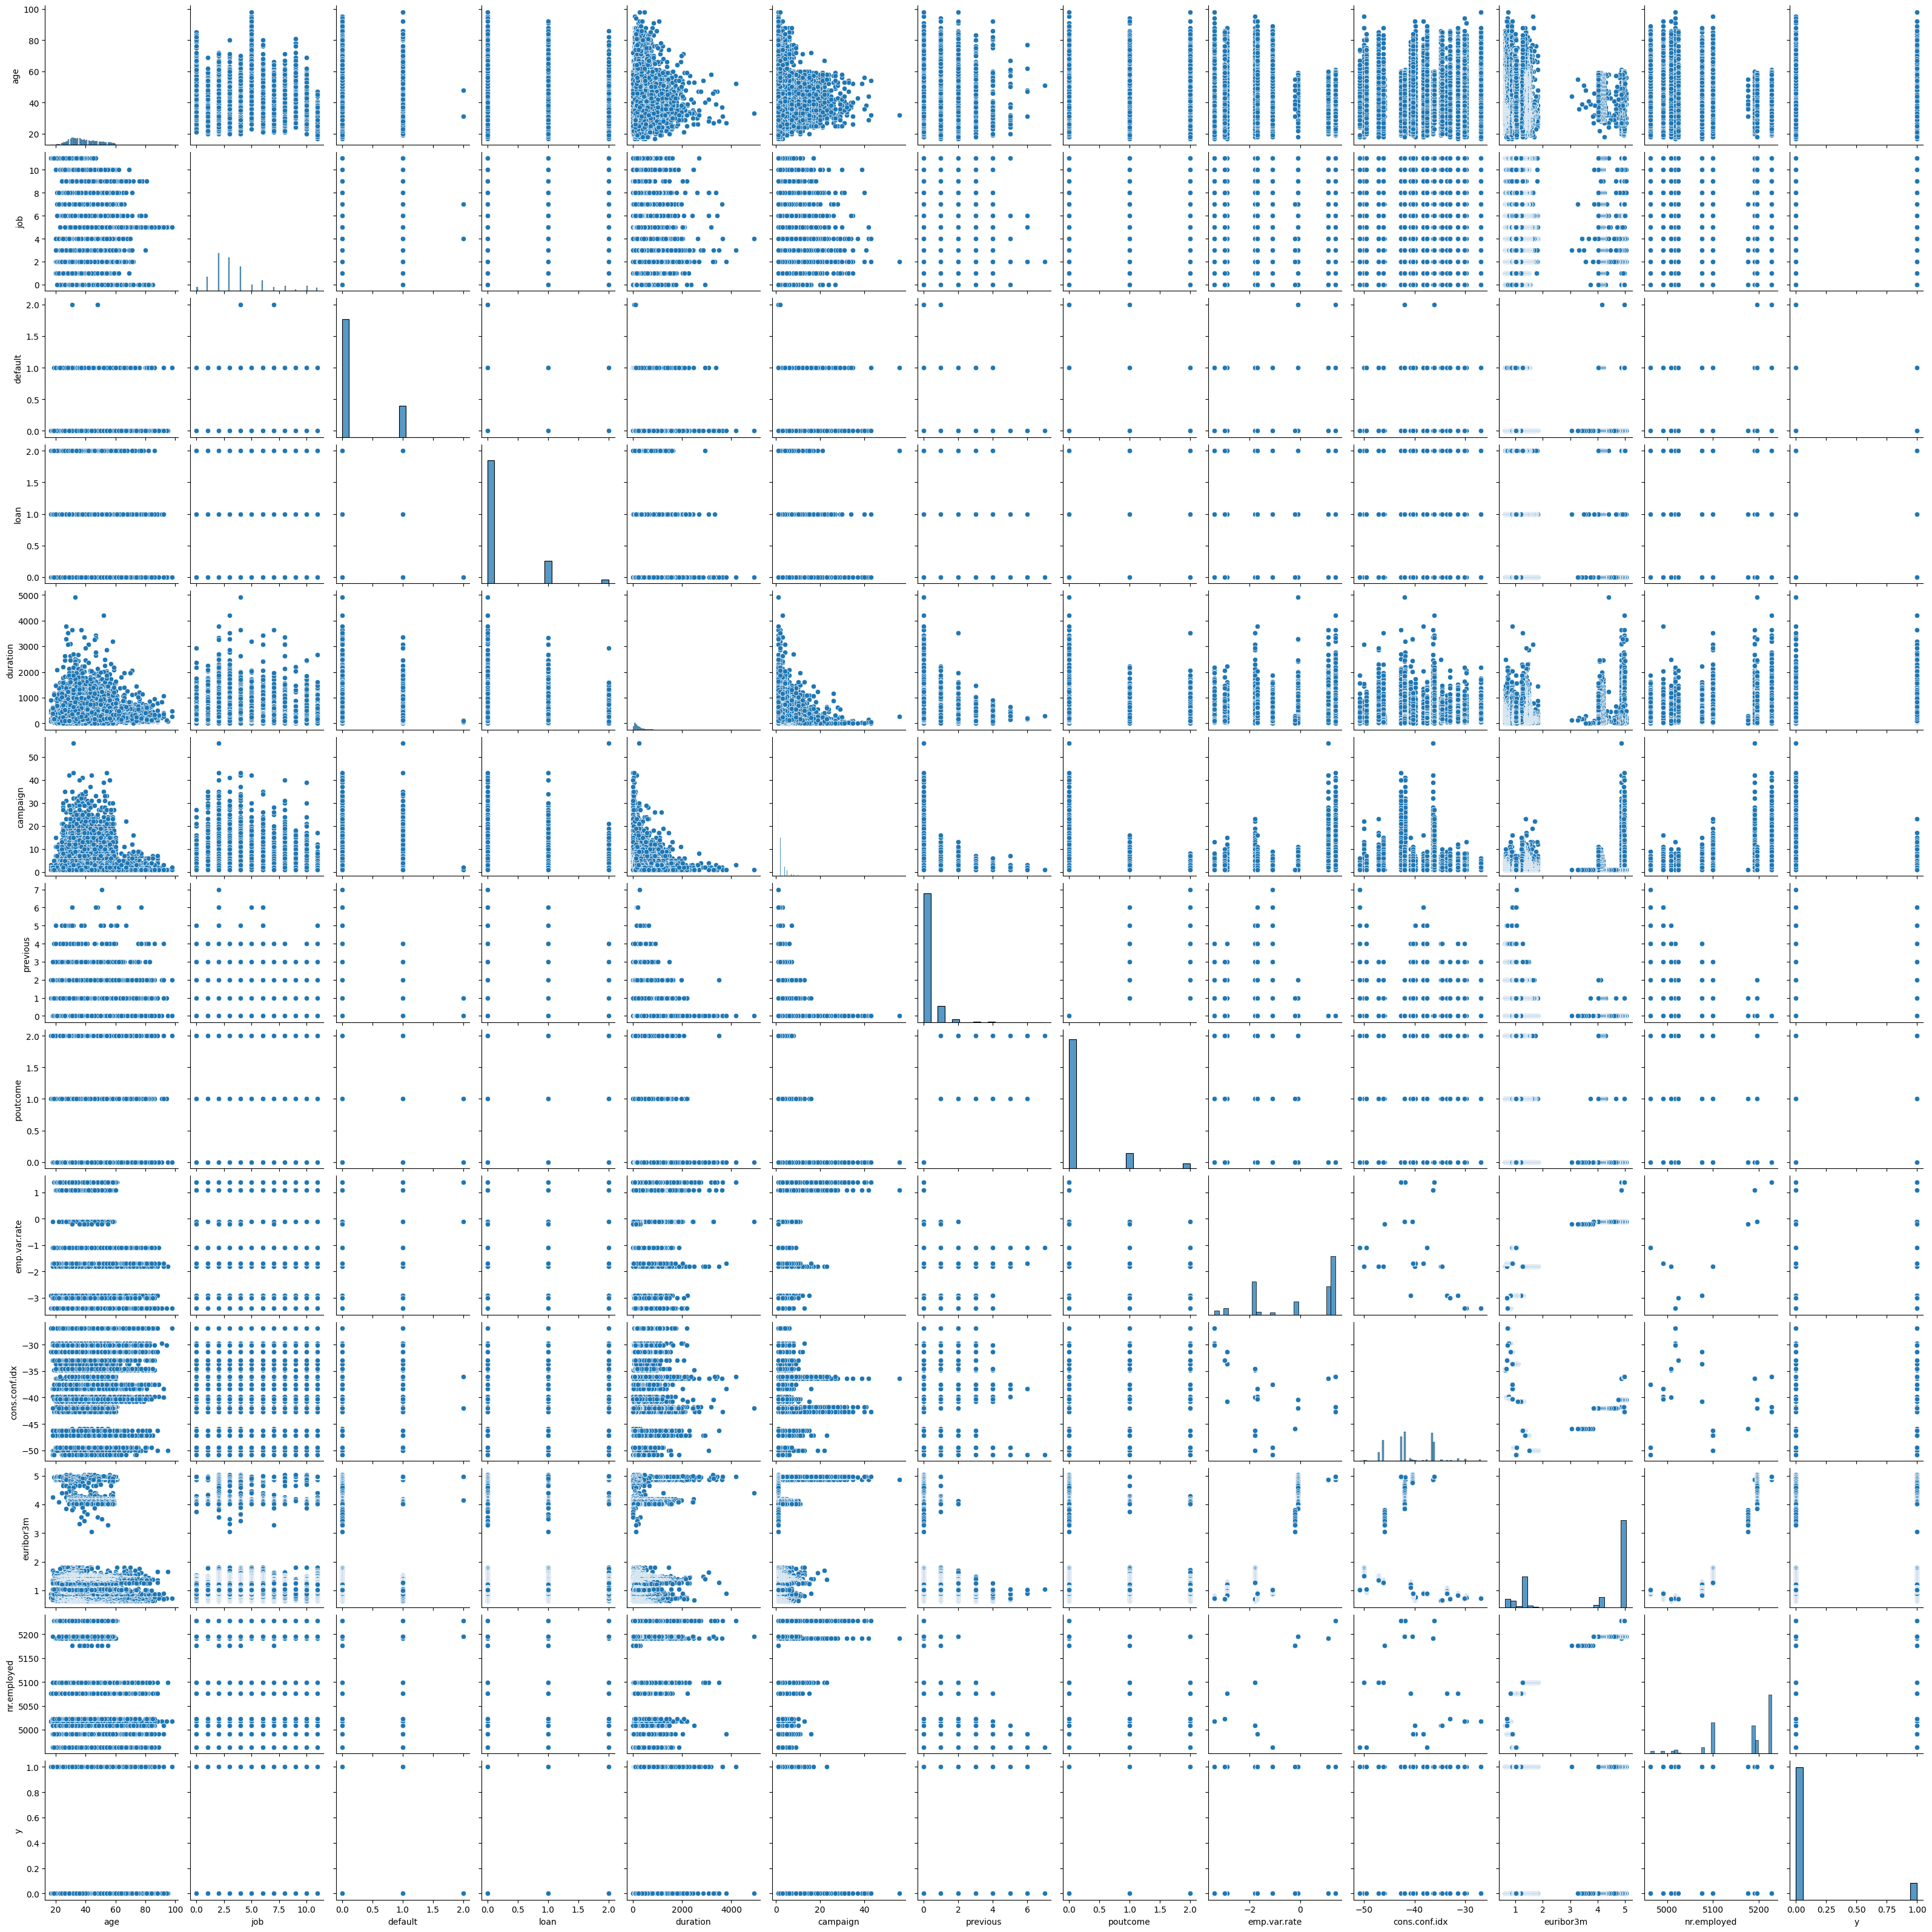

In [14]:
sns.pairplot(data=df)

After the analysis of all relevant variables, the following conclusions can be drawn:

* The majority of clients are concentrated in a range of professions.
* At least 70% of the clients do not have a loan, but most of them have a current mortgage.
* The target customer range is in the 30 - 40 year age group.
* The length of the customer contact call influences the contracting response.




**STEP 4: CHARACTERISTICS ENGINEERING**

**_4.0 Outlier Analysis_**

In [15]:
df.describe()

,age,job,default,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.673691,0.208872,0.199767,258.285010,2.567593,0.172963,0.169904,0.081886,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.406686,0.456002,259.279249,2.770014,0.494901,0.455754,1.570960,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,-1.800000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.100000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,0.000000,0.000000,319.000000,3.000000,0.000000,0.000000,1.400000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,2.000000,2.000000,4918.000000,56.000000,7.000000,2.000000,1.400000,-26.900000,5.045000,5228.100000,1.000000


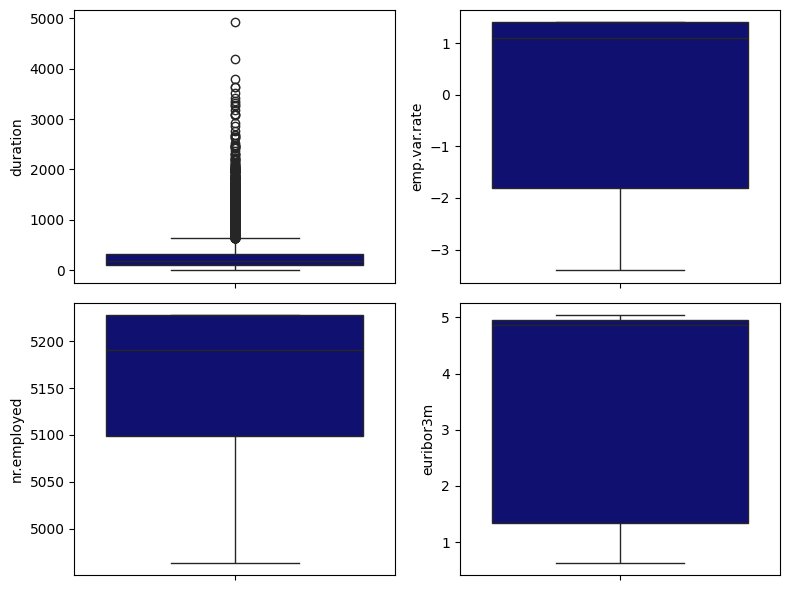

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (8, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = "duration", color="navy")
sns.boxplot(ax = axis[0, 1], data = df, y = "emp.var.rate", color="navy")
sns.boxplot(ax = axis[1, 0], data = df, y = "nr.employed", color="navy")
sns.boxplot(ax = axis[1, 1], data = df, y = "euribor3m", color="navy")


plt.tight_layout()

plt.show()

**_4.1 `duration` outlier_**

In [17]:
duration_outlier = df["duration"].describe()
duration_outlier

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [18]:
# Calculate the interquartile range (IQR) for duration
duration_iqr = duration_outlier["75%"] - duration_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = duration_outlier ["75%"] + 1.5 * duration_iqr
lower_limit = duration_outlier ["25%"] - 1.5 * duration_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {(duration_iqr, 2)}")


The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of (217.0, 2)


In [19]:
# Clean the outliers

df = df[df["duration"] < 0]

In [20]:
count_0 = df[df["duration"] == 0].shape[0]
count_1 = df[df["duration"] >= 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [21]:
nan_count = len(df) - df['duration'].notnull().sum()
print("Duration NaN:", nan_count)

Duration NaN: 0


In [22]:
df.isnull().sum().sort_values(ascending=False)

age              0.0
job              0.0
default          0.0
housing          0.0
loan             0.0
duration         0.0
campaign         0.0
previous         0.0
poutcome         0.0
emp.var.rate     0.0
cons.conf.idx    0.0
euribor3m        0.0
nr.employed      0.0
y                0.0
dtype: float64

In [23]:
df.dropna(subset=["duration"], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12212\572574143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["duration"], inplace=True)


**_4.2 Missing value analysis_**

In [24]:
df.isnull().sum().sort_values(ascending = False)

age              0.0
job              0.0
default          0.0
housing          0.0
loan             0.0
duration         0.0
campaign         0.0
previous         0.0
poutcome         0.0
emp.var.rate     0.0
cons.conf.idx    0.0
euribor3m        0.0
nr.employed      0.0
y                0.0
dtype: float64

**_4.3 Feature scaling_**

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Factorize categorical variables
df["job_n"] = pd.factorize(df["job"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]

# Define variables for scaling
num_variables = ["job_n", "default_n", "housing_n", "loan_n", "poutcome_n", "age", "duration", "campaign", "previous", "emp.var.rate", "euribor3m", "nr.employed", "y_n"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
scal_features = scaler.fit_transform(df[num_variables])

# Create a DataFrame with scaled features
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Display the scaled DataFrame
df_scal.head()


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by MinMaxScaler.

**STEP 5: FEACTURE SELECTION**

In [ ]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("y_n", axis = 1)
y = df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.000000,0.019497,0.203781
1,0.0,0.0,1.000000,0.981183,1.000000
2,0.0,0.0,0.333333,0.138291,0.512287
3,0.0,0.0,0.937500,0.956926,0.859735
4,0.0,0.0,0.937500,0.957379,0.859735


In [ ]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

### LOGISTIC REGRESSION

In [27]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,0.000000,0.019497,0.203781,1.0
1,0.0,0.0,1.000000,0.981183,1.000000,0.0
2,0.0,0.0,0.333333,0.138291,0.512287,0.0
3,0.0,0.0,0.937500,0.956926,0.859735,0.0
4,0.0,0.0,0.937500,0.957379,0.859735,0.0


In [28]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8953629521728574

**MODEL OPTIMIZATION**

In [42]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(C=0.1, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [44]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "newton-cg")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [45]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
accuracy_score(y_test, y_pred)

0.8975479485311969